In [ ]:
import joblib
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train = joblib.load("/content/X_train.pkl")
X_test  = joblib.load("/content/X_test.pkl")
y_train = joblib.load("/content/y_train.pkl")
y_test  = joblib.load("/content/y_test.pkl")

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (1595, 51)
Testing samples: (399, 51)


In [ ]:
model = IsolationForest(
    n_estimators=150,
    contamination=0.05,
    random_state=42
)

model.fit(X_train)


IsolationForest(contamination=0.05, n_estimators=150, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

# Convert labels to match ground truth
# IsolationForest: -1 = anomaly, 1 = normal


In [ ]:
y_pred_mapped = ['Anomaly' if x == -1 else 'Normal' for x in y_pred]

print("Classification Report:\n")
print(classification_report(y_test, y_pred_mapped))

Classification Report:

              precision    recall  f1-score   support

     Anomaly       0.00      0.00      0.00        14
      Normal       0.96      0.95      0.96       385

    accuracy                           0.92       399
   macro avg       0.48      0.48      0.48       399
weighted avg       0.93      0.92      0.92       399



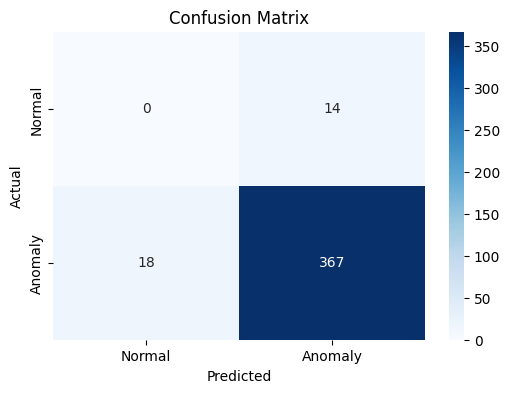

In [ ]:
cm = confusion_matrix(y_test, y_pred_mapped)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Anomaly"],
            yticklabels=["Normal", "Anomaly"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import os

# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(model, "models/isolation_forest_model.pkl")
print("✅ Model saved successfully")

✅ Model saved successfully
